# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

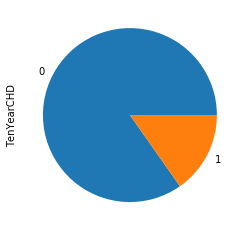

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [5]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)

### Nota Importante:
Para la **Parte 2**, el código debe correrse solo hasta acá debido a que x_train y x_test se modifican en la siguiente celda.

In [6]:
scaler = MinMaxScaler() # Utilice un MinMaxScaler #
x_train = scaler.fit_transform(x_train) # Ajuste y Aplique el Escalamiento (función fit_transform) #
x_test = scaler.transform(x_test) # Aplique el Escalamiento (función transform) #

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [7]:
logreg = LogisticRegression() # Modelo de Regresión Logística #
logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #

print(f'Precisión inicial: {accuracy_score(y_test, y_pred)}')

Precisión inicial: 0.8413333333333334


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

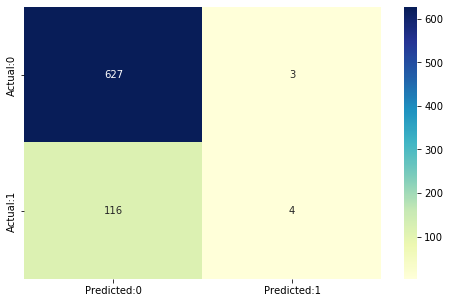

In [8]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Parte 1 - Desarrollo de Modelo Inicial - Conclusiones
En la Matriz de Confusión vemos que la destribución de clases está muy desbalanceada debido a que las personas parte del dataset y en general la mayoría no tiene riesgos de padecer una enfermedad coronaria. En el PieChart se ve que gran parte de las personas no tienen riesgo de padecer una enfermedad coronaria 10 años en el futuro. Es por esta razón que al hacer el entrenamiento de datos sea más fácil cometer un error de tipo 2 que un error de tipo 1.

En este caso es mucho peor cometer un error tipo 2 que un tipo 1 debido a que un mal diagnostico no le permite al paciente saber que tiene riesgo de enfermedad coronaria. Basado en el x_test, podemos calcular el Recall que nos permite hallar la gravedad del error tipo 2.

<a href="https://www.codecogs.com/eqnedit.php?latex=\frac{TP}{TP&space;&plus;&space;FN}&space;=&space;\frac{4}{4&space;&plus;&space;116}&space;=&space;0.033&space;=&space;3.3\%" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\frac{TP}{TP&space;&plus;&space;FN}&space;=&space;\frac{4}{4&space;&plus;&space;116}&space;=&space;0.033&space;=&space;3.3\%" title="\frac{TP}{TP + FN} = \frac{4}{4 + 116} = 0.033 = 3.3\%" /></a>

Únicamente el 3.3% de las personas con riesgo de padecer una enfermedad coronaria fueron diagnosticados correctamente. Por esta razón, debe hacerse un tratamiento a los datos desbalanceados cambiando el valor del umbral en el cual una persona es diagnosticada con riesgo o no.

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [9]:
from sklearn.preprocessing import binarize

umbrales = [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95] # Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test) # Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold = umbral)[:,1] # Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2)
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos negativos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')


->Para un umbral de 0.05 tenemos esta matriz de confusión:
[[ 87 543]
 [  5 115]]
Con 202 predicciones correctas y 5 falsos negativos.
Sensitividad: 0.9583 Especificidad: 0.1381

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[295 335]
 [ 18 102]]
Con 397 predicciones correctas y 18 falsos negativos.
Sensitividad: 0.85 Especificidad: 0.4683

->Para un umbral de 0.15 tenemos esta matriz de confusión:
[[434 196]
 [ 35  85]]
Con 519 predicciones correctas y 35 falsos negativos.
Sensitividad: 0.7083 Especificidad: 0.6889

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[510 120]
 [ 59  61]]
Con 571 predicciones correctas y 59 falsos negativos.
Sensitividad: 0.5083 Especificidad: 0.8095

->Para un umbral de 0.25 tenemos esta matriz de confusión:
[[544  86]
 [ 79  41]]
Con 585 predicciones correctas y 79 falsos negativos.
Sensitividad: 0.3417 Especificidad: 0.8635

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[584  46]
 [ 94  26]]
Con 610 predicciones cor

### Parte 1 - Tratamiento de Datos Desbalanceados - Conclusiones
Originalmente, al hacer la clasificación, la función `predict()` tiene como umbral el 50%. Lo que significa que si una de las personas tiene una probabilidad por encima de 0.5 de sufrir una enfermedad coronaria se toma como un paciente en riesgo, de lo contrario no. La función `predict_proba()` lo que nos permite es ver las probabilidades de que una persona pertenezca al grupo de pacientes en riesgo o no.

Luego, a partir de estas probabilidades y con ayuda de la función `binarize()` podemos manipular el umbral en el cual decidimos si un paciente pertenece a un grupo o al otro. El vector umbrales contiene diferentes valores, desde 0.05 hasta 0.95 con una variación de 0.05 entre ellos. Al hallar la Matriz de Confusión y calcular la sensitividad y especificidad vemos como cambia el comportamiento de este modelo en sus predicciones.

Para los umbrales más pequeños observamos que la sensitividad es muy alta y la especificidad es muy baja. Para los umbrales por encima de 0.35 pasa todo lo contrario, la sensitividad es baja y la especificidad es muy alta. Tenemos claro que es preferible tener una mayor sensitividad que una mayor especificidad debido a que es más importante identificar la mayor cantidad de casos riesgosos que clasificar a una persona el el grupo de riesgo cuando en realidad no lo está. Por lo tanto, podemos descartar todos los umbrales que sean superiores al 35%.

Un buen umbral que se puede escoger es del 15%. En este punto sacrificamos bastante la especificidad para tener una sensitividad razonable para que el modelo tenga una gran utilidad. Con estos datos de prueba pasamos de un 84.1% a un 69.2% de predicciones correctas y logramos disminuir la cantidad de falsos negativos de 116 a 35 personas (15% a 4.6%).

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

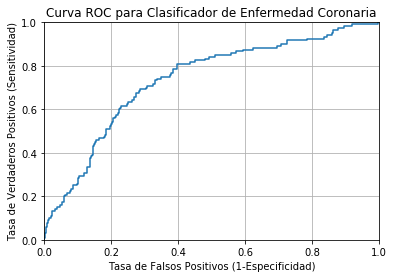

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

### Parte 1 - Análisis de Curva ROC - Conclusiones
En esta curva AUC-ROC vemos gráficamente lo mencionado anteriormente. El área bajo la curva es mayor a 0.5, lo que significa que el modelo es capaz de clasificar los datos correctamente en cierto porcentaje. A la parte izquierda de la gráfica se encuentran los valores de umbral más altos y a la derecha los más bajos. Viendo la gráfica se podría decir que un buen balance entre la tasa de verdaderos positivos y falsos positivos puede estar alrededor de 0.8 para TPR y 0.4 para FPR. En este caso, el modelo tiene una sensitividad del 80% cuando su umbral es aproximadamente 0.11. Este valor de umbral óptimo es muy cercano al mencionado anteriormente de 0.15. 

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [6]:
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100

def sigma(w,x):
    res_sigmoid = 1 / (1 + np.exp(-np.dot(w,x))) # Salida de la función sigmoide #
    return res_sigmoid

tasas = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01] # Defina un vector que contenga las tasas que desea probar #
for tasa in tasas:
    # while error>eps:         # Criterio de parada 1 #
    for j in range (0, 1000):  # Criterio de parada 2 #
        w0 = w
        i = np.random.randint(0, X_train_array.shape[0]-1)
        xActual = X_train_array[i]
        yActual = y_train_array[i]
        g = sigma(w0,xActual)
        error = yActual - g
        w = w0 + tasa * error * xActual
    X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
    y_test_array = y_test.values

    y_pred = np.zeros(len(x_test))

    for i in range(0,len(x_test)):
      prob = sigma(w,X_test_array[i])
      if prob>0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0

    print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

Precisión modelo actual: 0.16133333333333333
Precisión modelo actual: 0.84
Precisión modelo actual: 0.812
Precisión modelo actual: 0.208
Precisión modelo actual: 0.84
Precisión modelo actual: 0.844


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

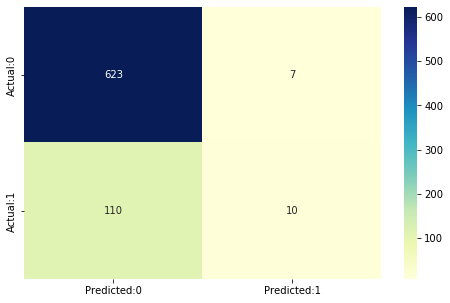

In [7]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Parte 2 - Implementación de Regresión Logística - Conclusiones
El mejor modelo se obtuvo con una tasa de aprendizaje de 0.006, arrojando una precisión del 84.4% que es un poco mayor a la obtenida con la función `predict()` que es del 84.13%. La Matriz de Confusión que se obtuvo es la siguiente:

<a href="https://www.codecogs.com/eqnedit.php?latex=\begin{bmatrix}&space;TP&space;&&space;FP\\&space;FN&space;&&space;TN&space;\end{bmatrix}&space;=&space;\begin{bmatrix}&space;623&space;&&space;7\\&space;110&space;&&space;10&space;\end{bmatrix}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\begin{bmatrix}&space;TP&space;&&space;FP\\&space;FN&space;&&space;TN&space;\end{bmatrix}&space;=&space;\begin{bmatrix}&space;623&space;&&space;7\\&space;110&space;&&space;10&space;\end{bmatrix}" title="\begin{bmatrix} TP & FP\\ FN & TN \end{bmatrix} = \begin{bmatrix} 623 & 7\\ 110 & 10 \end{bmatrix}" /></a>

Se obtuvieron 630 predicciones correctas y 110 falsos negativos. A continuación se muestra el cálculo de Sensitividad y Especificidad:

<a href="https://www.codecogs.com/eqnedit.php?latex=\text{Sensitividad}&space;=&space;\frac{TP}{TP&space;&plus;&space;FN}&space;=&space;\frac{10}{10&space;&plus;&space;110}&space;=&space;0.0833" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\text{Sensitividad}&space;=&space;\frac{TP}{TP&space;&plus;&space;FN}&space;=&space;\frac{10}{10&space;&plus;&space;110}&space;=&space;0.0833" title="\text{Sensitividad} = \frac{TP}{TP + FN} = \frac{10}{10 + 110} = 0.0833" /></a>

<a href="https://www.codecogs.com/eqnedit.php?latex=\text{Especificidad}&space;=&space;\frac{TN}{TN&space;&plus;&space;FP}&space;=&space;\frac{623}{623&space;&plus;&space;7}&space;=&space;0.9889" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\text{Especificidad}&space;=&space;\frac{TN}{TN&space;&plus;&space;FP}&space;=&space;\frac{623}{623&space;&plus;&space;7}&space;=&space;0.9889" title="\text{Especificidad} = \frac{TN}{TN + FP} = \frac{623}{623 + 7} = 0.9889" /></a>

Como podemos observar, efectivamente la sensitividad y la especificidad son inversamente proporcionales. En este caso tenemos una especificidad bastante alta y una sensitividad muy baja. A pesar de que el modelo tiene muchas predicciones correctas y mejora el modelo arrojado al utilizar únicamente la función `predict()`, el modelo sigue teniendo los mismos problemas del que se encontró inicialmente. La baja sensitividad hace que el modelo sea poco útil al diagnosticar pacientes con riesgo de sufrir una enfermedad coronaria en los próximos 10 años debido a que la cantidad de casos riesgosos mal diagnosticados respecto a los correctamente diagnosticados es demasiado alta. Es por esta razón que debe hacerse un ajuste en el umbral para que al disminuirlo aumentemos la especificidad sacrificando parte de la sensitividad. Este problema es principalmente ocasionado por tener un dataset desbalanceado, no tiene que ver con la ejecución del algoritmo de ascenso estocástico. 